#EXTRACCIÓN DE DATOS

In [30]:
#Importación módulos
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

#Importación csv
archivo = pd.read_csv("https://drive.google.com/uc?id=1Bl6P4csc7Swwh8t8GNF2KZMVNxn72m3a")
archivo.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


#EXPLORACIÓN Y TRANSFORMACIÓN DE DATOS

In [31]:
df= archivo.drop(columns= "Unnamed: 0")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


No hay missing values o datos nulos dentro de nuestro dataset. No es necesario utilizar técnicas de rellenamiento de datos.

In [33]:
df.duplicated().sum()


42

In [34]:
#Cambiar nombres de categorías para mayor comprensión
# Remote ratio
df.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','No remote work'], inplace=True)

# Experience Level
df.experience_level.replace(['EN','MI','SE','EX'],['Entry','Junior','Senior','Expert'],inplace=True)

# Employment Type
df.employment_type.replace(['FT','PT','CT','FL'],['Full Time','Part Time','Contract','Freelance'], inplace=True)

#Company size

df.company_size.replace(['S','M','L'],['Small','Medium','Large'], inplace=True)

#EXPLORATORY DATA ANALYSIS

##Posición de trabajo más frecuente

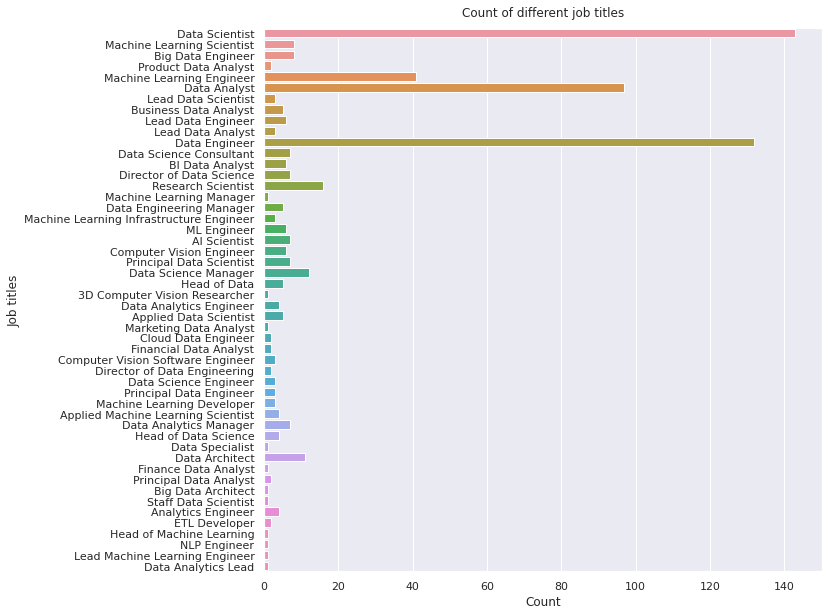

In [35]:
sns.countplot(y="job_title", data=df, orient="h",)
sns.set(rc={'figure.figsize':(25,25)})
plt.ylabel('Job titles')
plt.xlabel('Count')
plt.title('Count of different job titles', y=1.01);


In [36]:
df['job_title'].value_counts()[:15]

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
AI Scientist                    7
Data Science Consultant         7
Director of Data Science        7
Data Analytics Manager          7
ML Engineer                     6
Name: job_title, dtype: int64

El trabajo de Data Scientist es el más frecuente.




##Employment type más popular en el área de la ciencia de datos

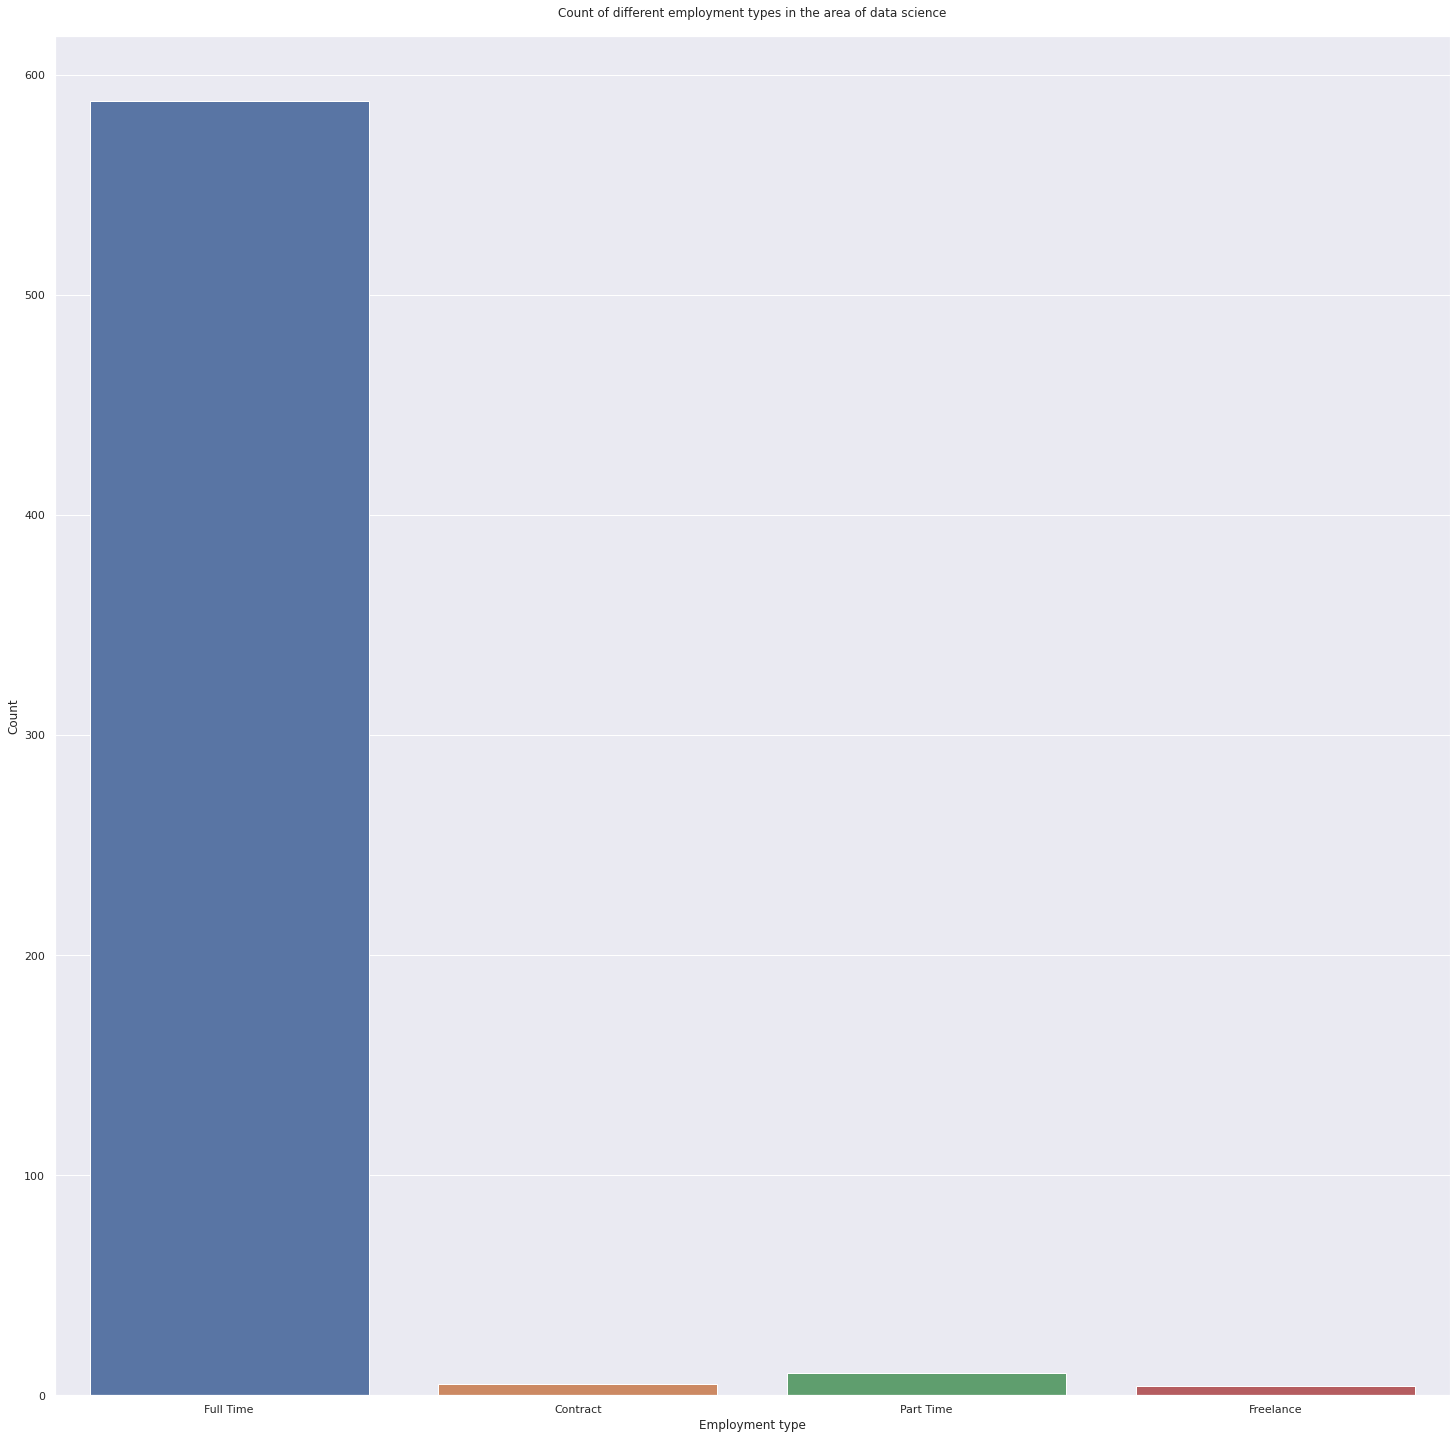

In [37]:
sns.countplot(x='employment_type', data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.ylabel('Count')
plt.xlabel('Employment type')
plt.title('Count of different employment types in the area of data science', y=1.01);


La mayoría de las personas dentro del área de la ciencia de datos trabajan Full time.

##Tipo de trabajo más común en la ciencia de datos


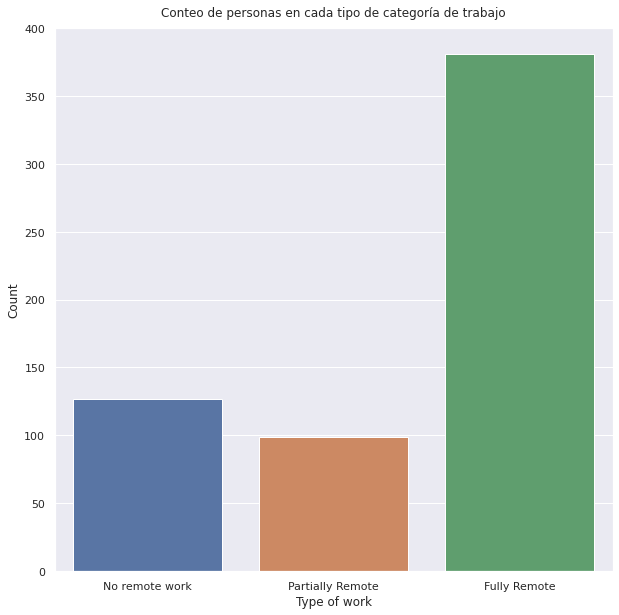

In [38]:
sns.countplot(x="remote_ratio", data=df, orient="h",)
sns.set(rc={'figure.figsize':(25,25)})
plt.ylabel('Count')
plt.xlabel('Type of work')
plt.title('Conteo de personas en cada tipo de categoría de trabajo', y=1.01);

A partir de este gráfico vemos que en el área de la ciencia de datos los trabajos más comunes son los Totalmente Remotos

#Cantidad de trabajos en el área de la ciencia de datos a través de los años

Text(0.5, 1.01, 'Count of different data science professionals in the different years')

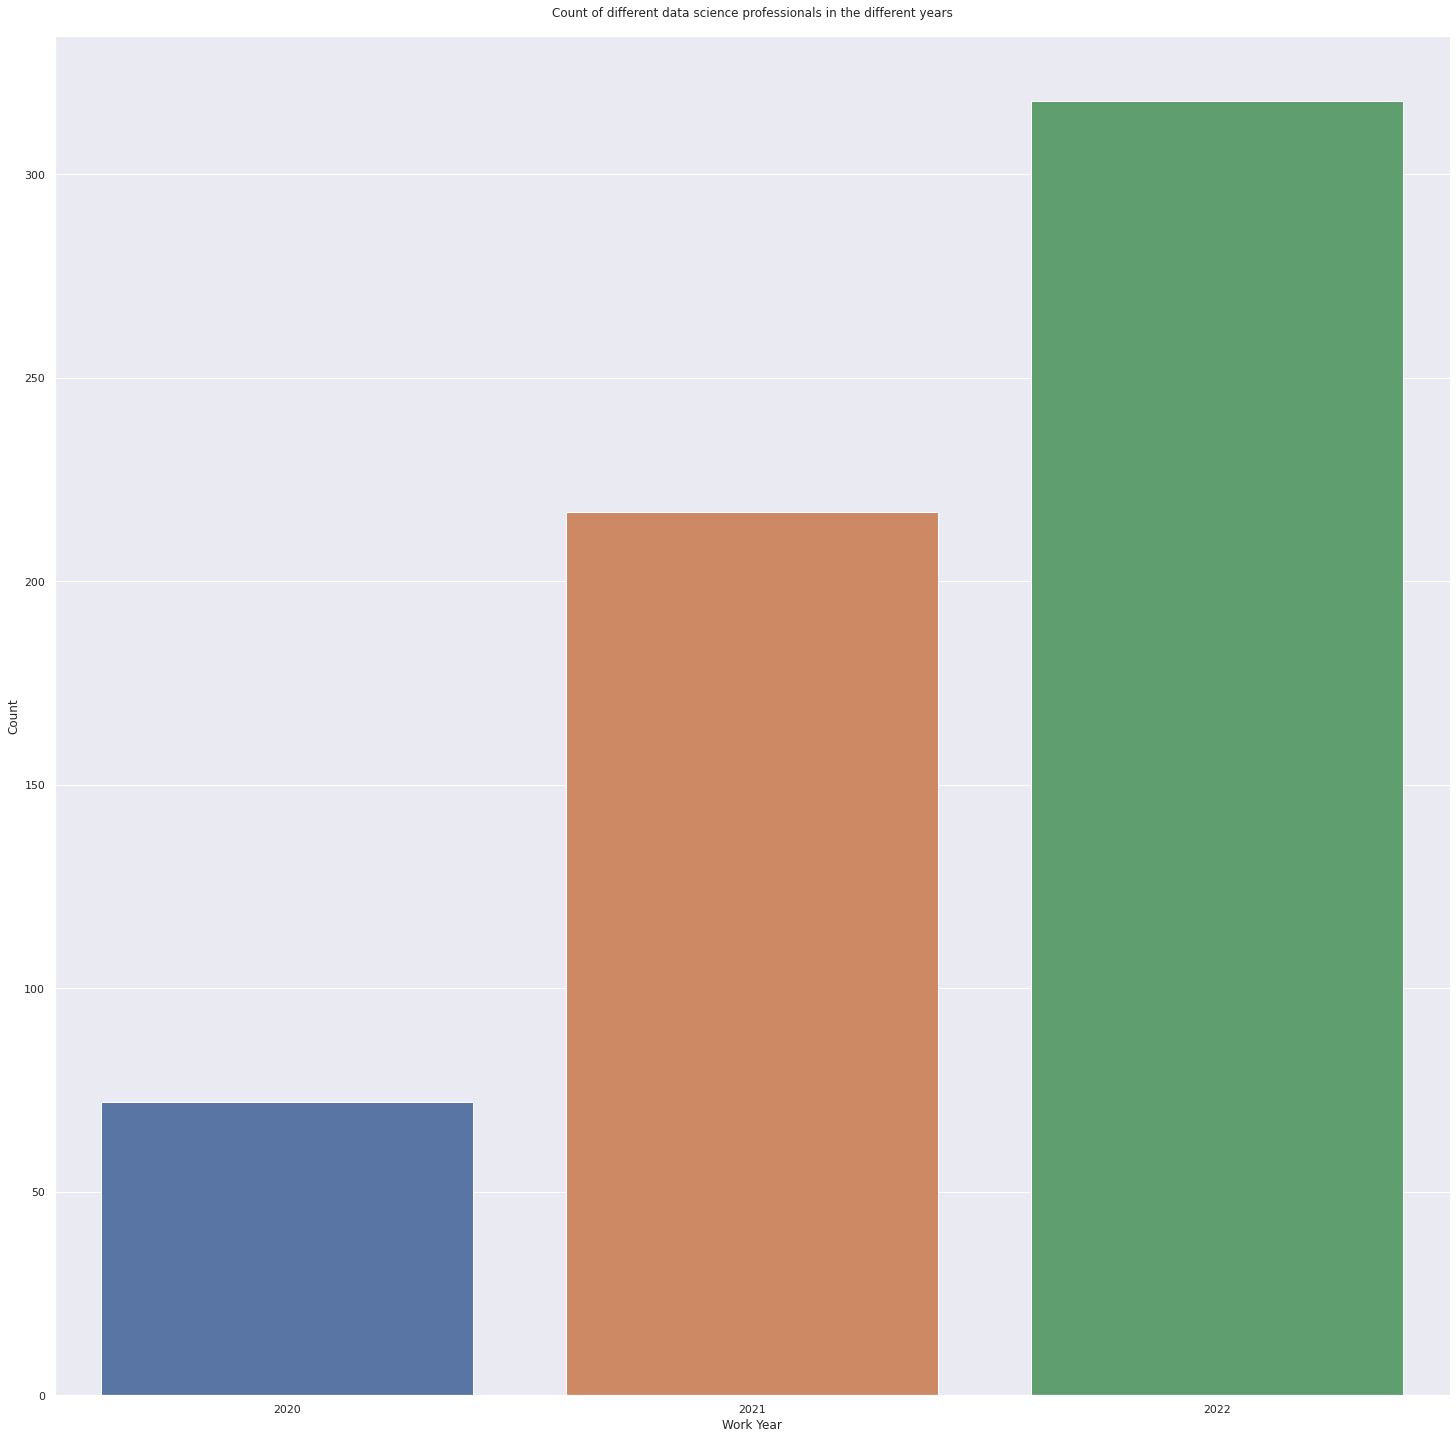

In [39]:
sns.countplot(x='work_year', data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.ylabel('Count')
plt.xlabel('Work Year')
plt.title('Count of different data science professionals in the different years', y=1.01)

Está en aumento los trabajos relacionados a la ciencia de datos.

##Salario promedio en base a distintas categorías

In [40]:
#Cálculo de salarios promedio
avg_sal_per_job =df.groupby('job_title').mean()['salary_in_usd']
avg_sal_per_experiencie=df.groupby('experience_level').mean()['salary_in_usd']
avg_sal_per_company_size=df.groupby('company_size').mean()['salary_in_usd']
avg_sal_per_remote_work=df.groupby('remote_ratio').mean()['salary_in_usd']
avg_sal_per_employment_type=df.groupby('employment_type').mean()['salary_in_usd']

###Salario promedio por posición de trabajo

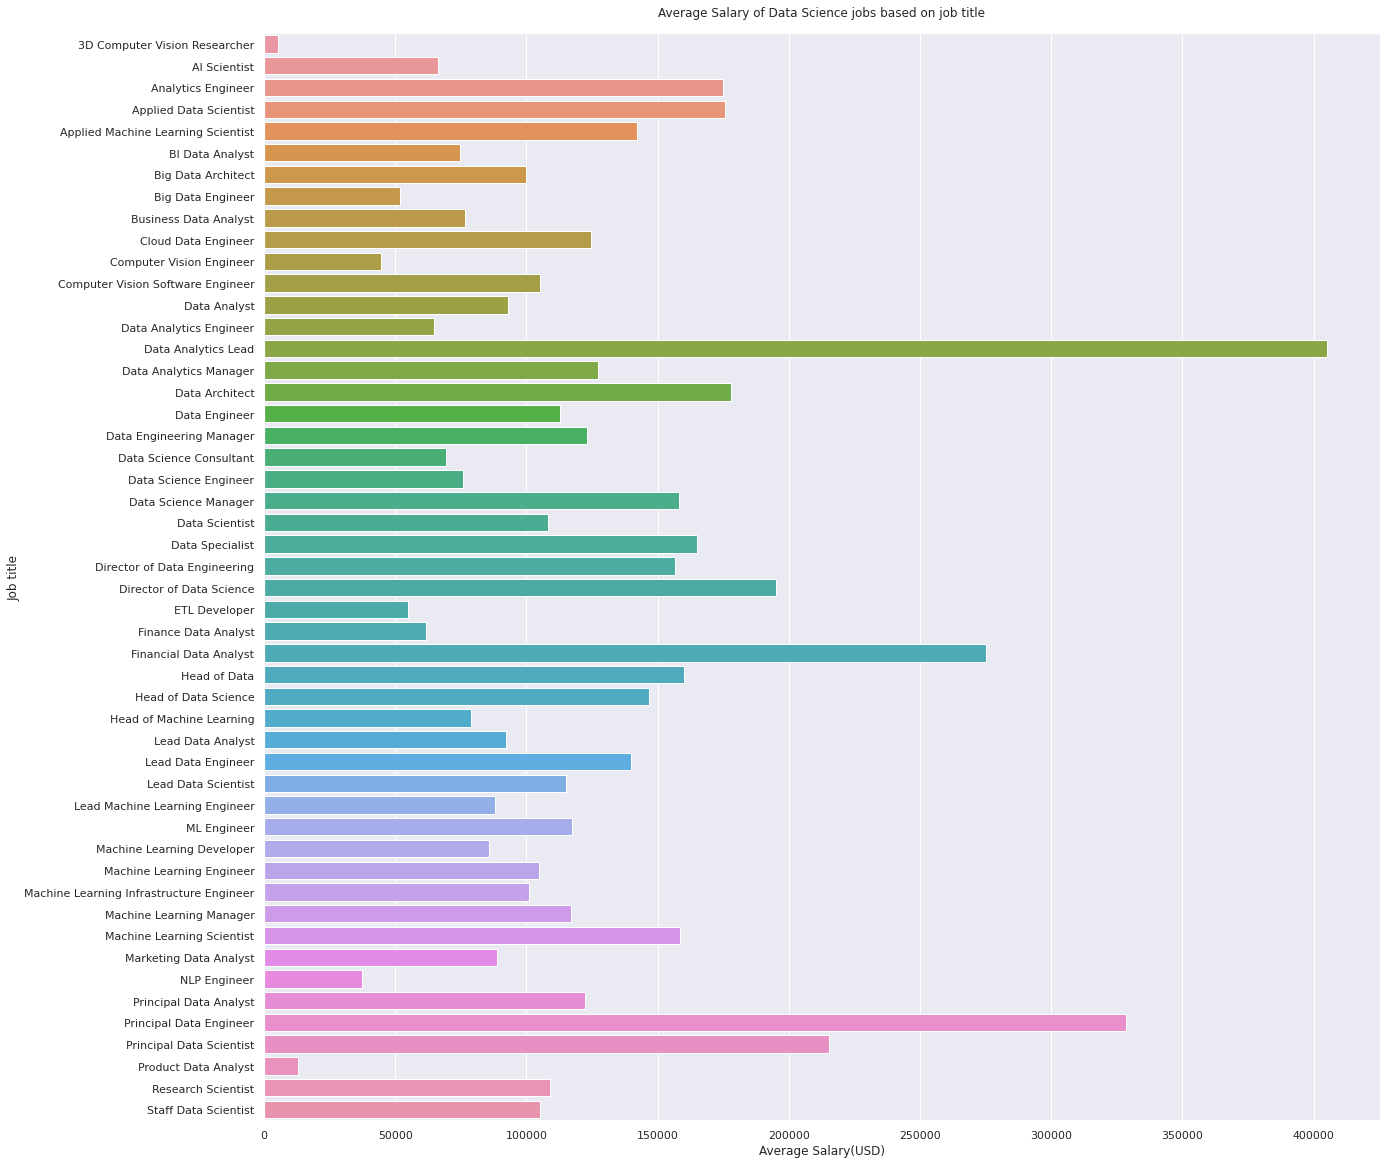

In [41]:
plt.figure(figsize=(20,20))
sns.barplot(x=avg_sal_per_job.values,y=avg_sal_per_job.index)
plt.xlabel('Average Salary(USD)')
plt.ylabel('Job title')
plt.title('Average Salary of Data Science jobs based on job title', y=1.01);


###Salario promedio por nivel de experiencia

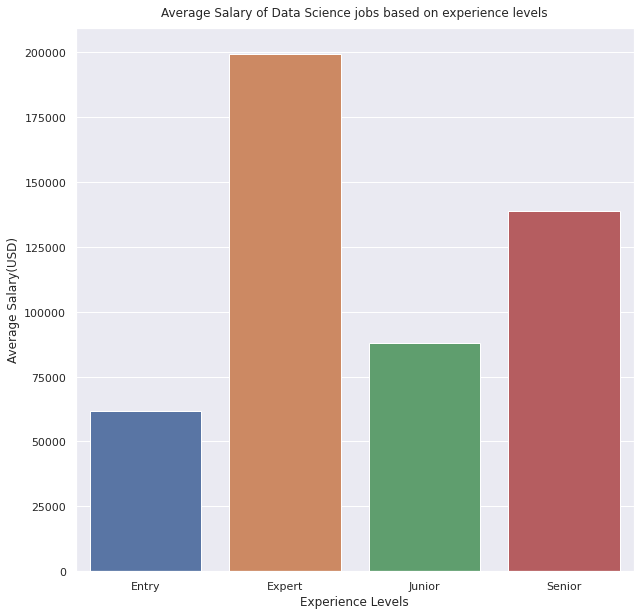

In [42]:
plt.figure(figsize=(10,10))
sns.barplot(x=avg_sal_per_experiencie.index,y=avg_sal_per_experiencie.values)
plt.xlabel('Experience Levels')
plt.ylabel('Average Salary(USD)')
plt.title('Average Salary of Data Science jobs based on experience levels', y=1.01);

###Salario promedio por tamaño de la compañía

'\nfig, axes = plt.subplots(1,3, figsize = (15,4))\n\n#fig.subtitle("El salario en dolares con respecto al titulo del trabajo, el nivel de experiencia y el trabajo remoto", fontsize = 19)\n\nsns.barplot(ax = axes[0,0], data = df, x = \'job_title\', y = \'salary_in_usd\')\nsns.barplot(ax = axes[0,1], data = df, x = \'experience_level\', y = \'salary_in_usd\')\nsns.barplot(ax = axes[0,2], data = df, x = \'remote_radio\', y = \'salary_in_usd\')\n'

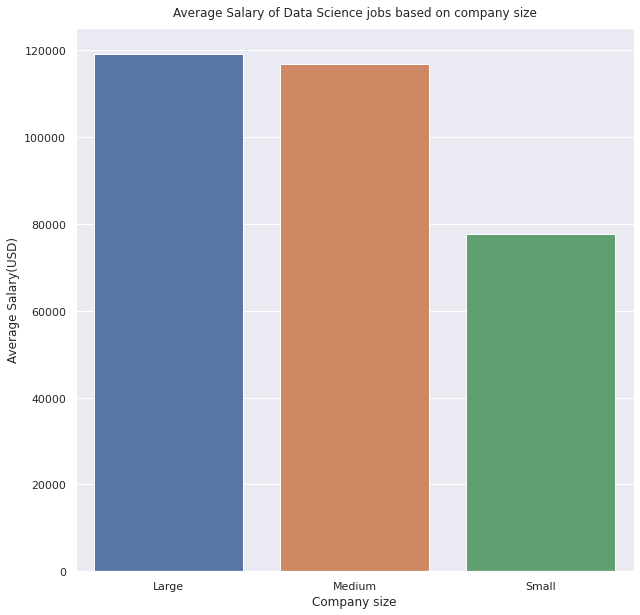

In [43]:
plt.figure(figsize=(10,10))
sns.barplot(x=avg_sal_per_company_size.index,y=avg_sal_per_company_size.values)
plt.xlabel('Company size')
plt.ylabel('Average Salary(USD)')
plt.title('Average Salary of Data Science jobs based on company size', y=1.01);

'''
fig, axes = plt.subplots(1,3, figsize = (15,4))

#fig.subtitle("El salario en dolares con respecto al titulo del trabajo, el nivel de experiencia y el trabajo remoto", fontsize = 19)

sns.barplot(ax = axes[0,0], data = df, x = 'job_title', y = 'salary_in_usd')
sns.barplot(ax = axes[0,1], data = df, x = 'experience_level', y = 'salary_in_usd')
sns.barplot(ax = axes[0,2], data = df, x = 'remote_radio', y = 'salary_in_usd')
'''

###Salario promedio por trabajo remoto


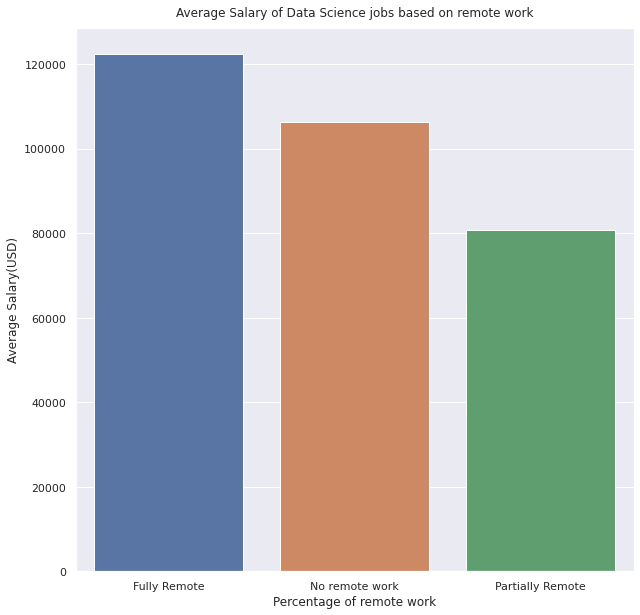

In [44]:
avg_sal_per_remote_work=df.groupby('remote_ratio').mean()['salary_in_usd']
sns.barplot(x=avg_sal_per_remote_work.index,y=avg_sal_per_remote_work.values)
plt.xlabel('Percentage of remote work')
plt.ylabel('Average Salary(USD)')
plt.title('Average Salary of Data Science jobs based on remote work', y=1.01);

###Salario promedio por tipo de empleamiento


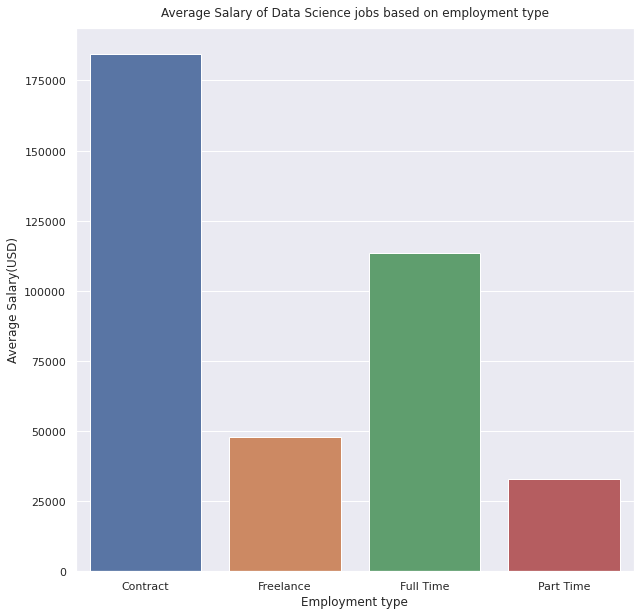

In [45]:
plt.figure(figsize=(10,10))
sns.barplot(x=avg_sal_per_employment_type.index,y=avg_sal_per_employment_type.values)
plt.xlabel('Employment type')
plt.ylabel('Average Salary(USD)')
plt.title('Average Salary of Data Science jobs based on employment type', y=1.01);


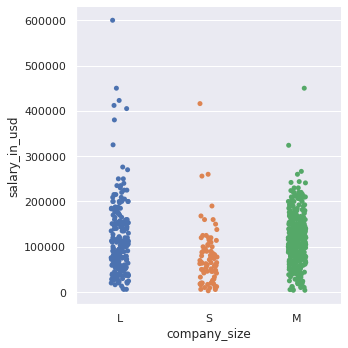

In [46]:
sns.catplot(x='company_size', y='salary_in_usd', data=archivo)

#ARREGLO PARA ANÁLISIS PREDICTIVO

In [47]:
jobtitle = df.groupby('job_title').size().sort_values(ascending = False)
jobtitle.head(10)

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Director of Data Science        7
dtype: int64

In [48]:
dataset = df.loc[df.job_title.isin(['Data Scientist', 'Data Engineer',"Data Analyst","Machine Learning Engineer","Research Scientist","Data Science Manager","Data Architect","Big Data Engineer","Machine Learning Scientist","Director of Data Science"])]
dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Junior,Full Time,Data Scientist,70000,EUR,79833,DE,No remote work,DE,Large
1,2020,Senior,Full Time,Machine Learning Scientist,260000,USD,260000,JP,No remote work,JP,Small
2,2020,Senior,Full Time,Big Data Engineer,85000,GBP,109024,GB,Partially Remote,GB,Medium
4,2020,Senior,Full Time,Machine Learning Engineer,150000,USD,150000,US,Partially Remote,US,Large
5,2020,Entry,Full Time,Data Analyst,72000,USD,72000,US,Fully Remote,US,Large
...,...,...,...,...,...,...,...,...,...,...,...
601,2022,Entry,Full Time,Data Analyst,52000,USD,52000,CA,No remote work,CA,Medium
602,2022,Senior,Full Time,Data Engineer,154000,USD,154000,US,Fully Remote,US,Medium
603,2022,Senior,Full Time,Data Engineer,126000,USD,126000,US,Fully Remote,US,Medium
604,2022,Senior,Full Time,Data Analyst,129000,USD,129000,US,No remote work,US,Medium


In [49]:
predictive = dataset.drop(columns=["salary_currency","employee_residence","company_location","salary"],inplace =True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
predictive = pd.get_dummies(dataset)
predictive

,work_year,salary_in_usd,experience_level_Entry,experience_level_Expert,experience_level_Junior,experience_level_Senior,employment_type_Freelance,employment_type_Full Time,employment_type_Part Time,job_title_Big Data Engineer,...,job_title_Director of Data Science,job_title_Machine Learning Engineer,job_title_Machine Learning Scientist,job_title_Research Scientist,remote_ratio_Fully Remote,remote_ratio_No remote work,remote_ratio_Partially Remote,company_size_Large,company_size_Medium,company_size_Small
0,2020,79833,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2020,260000,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2020,109024,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4,2020,150000,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
5,2020,72000,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,2022,52000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
602,2022,154000,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
603,2022,126000,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
604,2022,129000,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [51]:
predictive.columns.values

array(['work_year', 'salary_in_usd', 'experience_level_Entry',
       'experience_level_Expert', 'experience_level_Junior',
       'experience_level_Senior', 'employment_type_Freelance',
       'employment_type_Full Time', 'employment_type_Part Time',
       'job_title_Big Data Engineer', 'job_title_Data Analyst',
       'job_title_Data Architect', 'job_title_Data Engineer',
       'job_title_Data Science Manager', 'job_title_Data Scientist',
       'job_title_Director of Data Science',
       'job_title_Machine Learning Engineer',
       'job_title_Machine Learning Scientist',
       'job_title_Research Scientist', 'remote_ratio_Fully Remote',
       'remote_ratio_No remote work', 'remote_ratio_Partially Remote',
       'company_size_Large', 'company_size_Medium', 'company_size_Small'],
      dtype=object)

#ANÁLISIS PREDICTIVO

In [52]:
yvar = ['salary_in_usd']
Xvars = ['work_year', 'salary_in_usd', 'experience_level_Entry',
       'experience_level_Expert', 'experience_level_Junior',
       'experience_level_Senior', 'employment_type_Freelance',
       'employment_type_Full Time', 'employment_type_Part Time',
       'job_title_Big Data Engineer', 'job_title_Data Analyst',
       'job_title_Data Architect', 'job_title_Data Engineer',
       'job_title_Data Science Manager', 'job_title_Data Scientist',
       'job_title_Director of Data Science',
       'job_title_Machine Learning Engineer',
       'job_title_Machine Learning Scientist',
       'job_title_Research Scientist', 'remote_ratio_Fully Remote',
       'remote_ratio_No remote work', 'remote_ratio_Partially Remote',
       'company_size_Large', 'company_size_Medium', 'company_size_Small']


In [53]:
#Separando las variables
y = predictive[yvar]
X = predictive[Xvars]

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

##Entrenamiento


In [55]:
# Creando el modelo
# from sklearn.linear_model import LinearRegression
# modelo = LinearRegression()

from sklearn import tree
modelo = tree.DecisionTreeRegressor()

# Entrenando el modelo
modelo.fit(X_train, y_train)

DecisionTreeRegressor()

##Evaluación

In [56]:
y_eval = modelo.predict(X_test)

In [57]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_eval)
r2

0.9994313293344884

##Predicción

In [58]:
x_pred = pd.DataFrame({'work_year': [2020],
                       'salary_in_usd': [4000],
                       'experience_level_Entry': [0],
                       'experience_level_Expert': [1],
                       'experience_level_Junior': [0],
                       'experience_level_Senior': [0],
                       'employment_type_Freelance': [0],
                       'employment_type_Full Time': [0],
                       'employment_type_Part Time': [1],
                       'job_title_Big Data Engineer': [0],
                       'job_title_Data Analyst': [0],
                       'job_title_Data Architect':[0],
                       'job_title_Data Engineer': [1],
                       'job_title_Data Science Manager': [0],
                       'job_title_Data Scientist': [0],
                       'job_title_Director of Data Science': [0],
                       'job_title_Machine Learning Engineer': [0],
                       'job_title_Machine Learning Scientist': [0],
                       'job_title_Research Scientist': [0],
                       'remote_ratio_Fully Remote': [0],
                       'remote_ratio_No remote work': [0],
                       'remote_ratio_Partially Remote': [1],
                       'company_size_Large': [0],
                       'company_size_Medium': [1],
                       'company_size_Small': [0],})

y_pred = modelo.predict(x_pred)
y_pred

array([4000.])